In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [18]:
def add_gridticks(ax, x_max, y_max):
    minor_xticks = np.arange(-0.5, x_max-0.5, 1)
    ax.set_xticks(minor_xticks, minor=True)
    minor_yticks = np.arange(-0.5, y_max-0.5, 1)
    ax.set_yticks(minor_yticks, minor=True)
    ax.grid(which='minor', color='k')

    ax.set_xticks(np.arange(x_max))
    ax.set_yticks(np.arange(y_max))
    
def add_annotations(ax, values, obstacles, rewards):
    values = values.T
    obstacles = obstacles.T
    rewards = rewards.T
    for i in range(0, values.shape[0]):
        for j in range(0, values.shape[1]):
            if not (obstacles[i, j] or rewards[i, j]):
                ax.annotate('{0:.03f}'.format(values[i, j]), xy=(i, j), horizontalalignment='center', verticalalignment='center', fontsize=20)
    
    for i in range(0, rewards.shape[0]):
        for j in range(0, rewards.shape[1]):
            if (rewards[i, j]):
                ax.annotate('{0:+.03f}'.format(rewards[i, j]), xy=(i, j), horizontalalignment='center', verticalalignment='center', fontsize=20)
    
def plot_values(ax, values, obstacles, rewards):
    indices = np.where(obstacles == 0)
    ax.imshow(values, cmap='RdYlGn')
    
def plot_obstacles(ax, obstacles):
    cmap_white_black = matplotlib.colors.LinearSegmentedColormap.from_list('custom_white_black',['white','black'],256)
    cmap_white_black._init()
    alphas = np.linspace(0, 1, cmap_white_black.N+3)
    cmap_white_black._lut[:,-1] = alphas
    
    ax.imshow(obstacles, cmap=cmap_white_black)
    
def plot_rewards(ax, rewards):
    cmap_black_white = matplotlib.colors.LinearSegmentedColormap.from_list('custom_black_white',['black','white'],256)
    cmap_black_white._init()
    alphas = np.linspace(0, 1, cmap_black_white.N+3)
    cmap_black_white._lut[:,-1] = alphas
    
    ax.imshow(np.abs(rewards), cmap=cmap_black_white)
    
    
    
def plot_grid(x_max, y_max, obstacles, rewards, values):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    ax.set_title("Value Iteration")
    add_gridticks(ax, x_max, y_max)
    
    add_annotations(ax, values, obstacles, rewards)
    plot_values(ax, values, obstacles, rewards)
    plot_obstacles(ax, obstacles)
    plot_rewards(ax, rewards)
    
    plt.show()

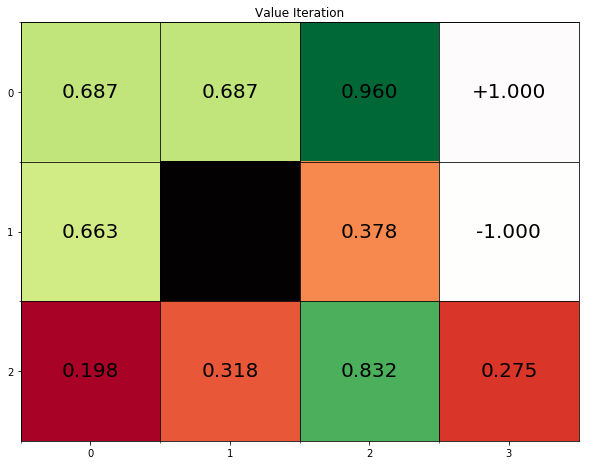

In [19]:
x_max = 4
y_max = 3

obstacles = np.zeros([y_max, x_max])
obstacles[1, 1] = 1

rewards = np.zeros([y_max, x_max])
rewards[0, 3] = 1
rewards[1, 3] = -1

values = np.random.rand(y_max, x_max)

plot_grid(x_max, y_max, obstacles, rewards, values)